In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def rgb_to_hsi(img):
    # Normalize RGB values to [0,1]
    img = img.astype(np.float32) / 255.0
    R, G, B = img[:, :, 2], img[:, :, 1], img[:, :, 0]

    # Intensity
    I = (R + G + B) / 3.0

    # Saturation
    min_val = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-8)) * min_val  # avoid division by zero

    # Hue calculation
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-8
    theta = np.arccos(num / den)

    H = np.zeros_like(R)
    H[B <= G] = theta[B <= G]
    H[B > G] = (2 * np.pi - theta[B > G])

    H = H / (2 * np.pi)  # Normalize to [0,1]

    return H, S, I


In [5]:
# Load Image
img = cv2.imread("sample.jpg")  # Change to your image path
if img is None:
    raise FileNotFoundError("Image not found!")
img = cv2.resize(img, (256, 256))  # Resize for display


In [6]:
# Convert to HSI
H, S, I = rgb_to_hsi(img)

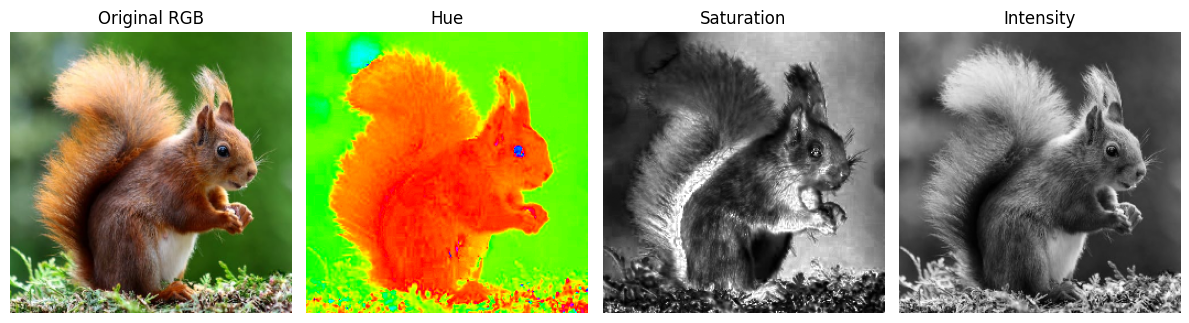

In [8]:
# Display
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(H, cmap="hsv")
plt.title("Hue")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(S, cmap="gray")
plt.title("Saturation")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(I, cmap="gray")
plt.title("Intensity")
plt.axis("off")

plt.tight_layout()
plt.show()
